In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
# Load dataset
df = pd.read_csv("cleaned_ufo_data.csv")

In [3]:
# Extract latitude and longitude as features
X = df[['latitude', 'longitude']]

In [4]:
# Random number of clusters 
num_clusters = 5

In [5]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

C:\Users\yvedu\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


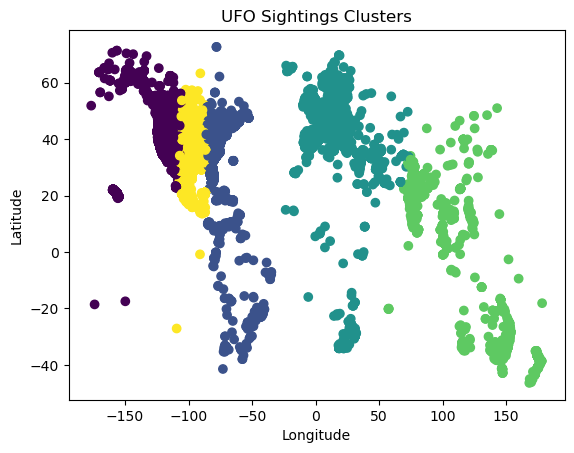

In [6]:
# Visualize the clusters on a map (scatter plot)
plt.scatter(df['longitude'], df['latitude'], c=df['cluster'], cmap='viridis')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('UFO Sightings Clusters')
plt.show()

In [7]:
# Calculate cluster statistics
cluster_stats = df.groupby('cluster').agg({
    'latitude': 'mean',
    'longitude': 'mean',
    'UFO_shape': 'count' 
}).rename(columns={'UFO_shape': 'num_sightings'}).reset_index()

print(cluster_stats)

   cluster   latitude   longitude  num_sightings
0        0  39.816956 -119.441797          22562
1        1  38.142292  -78.366941          31230
2        2  47.455518    5.141316           3530
3        3 -12.605115  125.636990           1156
4        4  37.651016  -94.048042          19359


In [8]:
# Identify hotspots (clusters with above-average sightings)
average_sightings = cluster_stats['num_sightings'].mean()
hotspot_clusters = cluster_stats[cluster_stats['num_sightings'] > average_sightings]

print('Hotspot Clusters:')
print(hotspot_clusters)

Hotspot Clusters:
   cluster   latitude   longitude  num_sightings
0        0  39.816956 -119.441797          22562
1        1  38.142292  -78.366941          31230
4        4  37.651016  -94.048042          19359


In [9]:
import folium

# Create a map centered around the average latitude and longitude
average_latitude = df['latitude'].mean()
average_longitude = df['longitude'].mean()
map_clusters = folium.Map(location=[average_latitude, average_longitude], zoom_start=4)


In [10]:
# Add markers for each cluster's central location
for index, row in cluster_stats.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Cluster {row['cluster']} - ({row['num_sightings']} sightings)",
        icon=folium.Icon(color='red', icon='info-sign')
    ).add_to(map_clusters)

# Display the map
map_clusters

In [11]:
# Print out the names of each cluster
for index, row in cluster_stats.iterrows():
    print(f"Cluster {row['cluster']}: Latitude {row['latitude']}, Longitude {row['longitude']}, Sightings {row['num_sightings']}")

Cluster 0.0: Latitude 39.81695570040777, Longitude -119.44179707733358, Sightings 22562.0
Cluster 1.0: Latitude 38.14229249440602, Longitude -78.366941255626, Sightings 31230.0
Cluster 2.0: Latitude 47.45551819546742, Longitude 5.141316353257791, Sightings 3530.0
Cluster 3.0: Latitude -12.60511493685121, Longitude 125.63699025086507, Sightings 1156.0
Cluster 4.0: Latitude 37.651016139077434, Longitude -94.048041871295, Sightings 19359.0


In [12]:
# Create a dictionary mapping cluster labels to place names
cluster_names = {
    0: 'Nevada',
    1: 'Virginia',
    2: 'France',
    3: 'Timor Sea',
    4: 'Missouri'
}

# Add a new column to the hotspot_clusters DataFrame for place names
hotspot_clusters['place_name'] = hotspot_clusters['cluster'].map(cluster_names)

# Print the updated hotspot_clusters DataFrame
print('Hotspot Clusters with Place Names:')
print(hotspot_clusters[['cluster', 'latitude', 'longitude', 'num_sightings', 'place_name']])


Hotspot Clusters with Place Names:
   cluster   latitude   longitude  num_sightings place_name
0        0  39.816956 -119.441797          22562     Nevada
1        1  38.142292  -78.366941          31230   Virginia
4        4  37.651016  -94.048042          19359   Missouri


C:\Users\yvedu\AppData\Local\Temp\ipykernel_34592\2649742787.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotspot_clusters['place_name'] = hotspot_clusters['cluster'].map(cluster_names)


In [13]:
# Identify hotspots (clusters with above-average sightings)
average_sightings = cluster_stats['num_sightings'].mean()
hotspot_clusters = cluster_stats[cluster_stats['num_sightings'] > average_sightings].copy()
hotspot_clusters['place_name'] = hotspot_clusters['cluster'].map(cluster_names)

print('Hotspot Clusters:')
print(hotspot_clusters)

Hotspot Clusters:
   cluster   latitude   longitude  num_sightings place_name
0        0  39.816956 -119.441797          22562     Nevada
1        1  38.142292  -78.366941          31230   Virginia
4        4  37.651016  -94.048042          19359   Missouri


In [16]:
# re-running map function to add place names

import folium

# Add a new column to the cluster_stats DataFrame for place names
cluster_stats['place_name'] = cluster_stats['cluster'].map(cluster_names)

# Calculate the mean latitude and longitude for centering the map
mean_latitude = df['latitude'].mean()
mean_longitude = df['longitude'].mean()

# Create a Folium map centered around the mean location
map_clusters = folium.Map(location=[mean_latitude, mean_longitude], zoom_start=4)

# Add markers for each cluster's central location with labels
for index, row in cluster_stats.iterrows():
    label = f"Cluster {row['cluster']} - {row['place_name']} ({row['num_sightings']} sightings)"
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        icon=folium.Icon(color='red', icon='info-sign'),
        popup=label,
        tooltip=row['place_name']
    ).add_to(map_clusters)

# Display the map
map_clusters